### 特征点检查和描述符计算

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('imgs/img[1].jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [3]:
sift = cv2.xfeatures2d.SIFT_create()

##### 特征点检测，以及描述符计算

In [4]:
# key_points = sift.detect(gray_img, None)
key_points, descriptors = sift.detectAndCompute(gray_img, None)

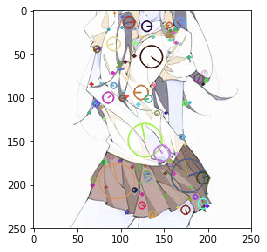

In [8]:
cv2.drawKeypoints(img, key_points, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)

In [9]:
print(len(key_points), type(key_points))
print(key_points[0])                    #opencv中的ketpoint对象
print(type(descriptors))
print(len(descriptors[0]))              #描述子长度

123 <class 'list'>
<KeyPoint 0000021C20233A50>
<class 'numpy.ndarray'>
128


#### 关于KeyPoint对象
> 成员
    - angle：关键点方向
    - class_id:分类的时候使用
    - octave：从金字塔的哪一层提取
    - pt:坐标
    - response:响应，也就是'how good'
    - size:直径


In [17]:
example_point = key_points[np.argmax([point.size for point in key_points])]

print(example_point.angle, example_point.pt, example_point.response)

258.2110290527344 (95.84121704101562, 195.9222412109375) 0.038526833057403564


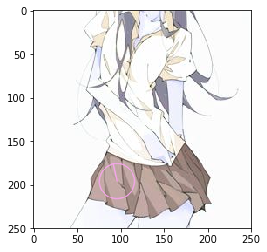

In [18]:
img = cv2.imread('imgs/img[1].jpg')
cv2.drawKeypoints(img, [example_point,], img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)
#不是很显眼

### 利用特征点进行匹配

In [20]:
MIN_MATCH_COUNT = 4

imgname1 = "imgs/Q1.png"
imgname2 = "imgs/Q2.png"

img1 = cv2.imread(imgname1)
img2 = cv2.imread(imgname2)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

In [21]:
kpts1, descs1 = sift.detectAndCompute(gray1,None)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

matches = matcher.knnMatch(descs1, descs2, 2)
matches = sorted(matches, key = lambda x:x[0].distance)
good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

In [22]:
canvas = img2.copy()

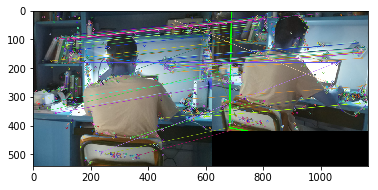

In [24]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))
matched = cv2.drawMatches(img1,kpts1,canvas,kpts2,good,None)#,**draw_params)
plt.imshow(matched)

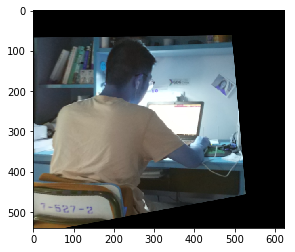

In [25]:
h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(img2,perspectiveM,(w,h))
plt.imshow(found)